In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
os.chdir('E:\\MLdataset')

In [4]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [5]:
x_csv = x_csv.to_numpy(dtype='float32')

In [6]:
x_5degree = x_csv[:, 0:15]

In [7]:
x_5degree.shape

(438, 15)

In [8]:
x = x_5degree.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [11]:
y = y_5degree.reshape((73*6, 100, 100))

In [12]:
tsr = x_csv[:, -2]

In [13]:
theta = x_csv[:, -1]

In [14]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [15]:
print(y_train.shape)

(394, 100, 100)


In [16]:
print(y_test.shape)

(44, 100, 100)


In [17]:
print(x_train.shape)

(394, 15, 1)


In [18]:
print(x_test.shape)

(44, 15, 1)


In [19]:
theta_train

array([ 40., 165.,  55., 325.,  20., 155.,  90.,  75.,  75., 265.,   0.,
        95., 305., 350., 280.,   5., 245., 100., 185., 330., 325.,  30.,
       125.,   0., 255., 200., 210.,  95., 250., 230., 100., 255.,  65.,
       110., 230.,  85., 130., 215., 300., 285., 320., 120.,  85., 330.,
       230., 205., 155.,  55.,  65., 135., 105.,  40., 320.,  30., 315.,
       265., 270.,  25., 225.,  10., 315.,  60., 280.,  80., 195., 220.,
       220.,  15.,  90., 110., 300., 110., 320., 315., 185., 290., 330.,
       145., 335., 325.,  50., 130.,  35., 150., 160., 175., 130., 215.,
       225., 205., 340., 315., 160., 210., 260., 305., 120., 145., 300.,
       170., 265., 180., 330., 360.,  90.,  80., 165.,  50., 210., 130.,
         5., 295., 110., 230., 245., 115., 235., 140., 310., 245.,  45.,
       220.,  15., 180., 330., 140., 190., 100., 170., 295., 190., 250.,
       310.,  30., 120.,  50.,  60.,  20., 155.,  50.,  60., 150.,  40.,
       150., 275., 105., 225., 200., 150.,  60., 32

In [20]:
tsr_train

array([1.7, 1.5, 1.7, 1.9, 1.6, 1.8, 2. , 1.5, 2. , 1.6, 1.5, 1.5, 1.8,
       1.8, 1.5, 1.8, 1.9, 1.6, 1.9, 1.8, 1.8, 2. , 1.5, 2. , 2. , 1.6,
       1.5, 1.7, 2. , 2. , 1.9, 1.6, 1.9, 1.5, 1.5, 1.6, 1.8, 1.6, 2. ,
       1.5, 1.6, 1.5, 1.5, 1.5, 1.8, 2. , 1.5, 1.6, 2. , 1.7, 1.6, 1.8,
       2. , 1.7, 1.9, 1.8, 2. , 1.5, 1.5, 1.7, 2. , 2. , 1.8, 1.5, 2. ,
       1.6, 2. , 1.5, 1.5, 1.7, 1.5, 1.9, 1.9, 1.5, 1.6, 1.8, 1.9, 1.5,
       1.6, 1.7, 1.8, 1.5, 1.5, 1.7, 2. , 1.6, 1.9, 2. , 1.6, 1.6, 1.6,
       1.7, 1.9, 1.9, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.6,
       1.8, 2. , 2. , 1.6, 2. , 1.7, 1.6, 1.9, 2. , 1.6, 2. , 2. , 1.7,
       1.8, 1.8, 1.7, 1.9, 1.9, 1.8, 1.5, 1.6, 1.9, 1.7, 1.8, 1.8, 1.5,
       1.6, 1.7, 1.7, 1.5, 1.9, 1.9, 1.7, 1.7, 1.7, 1.5, 1.8, 1.6, 1.6,
       1.8, 1.8, 1.7, 2. , 2. , 1.9, 1.9, 1.7, 1.7, 1.6, 2. , 1.7, 1.7,
       1.7, 1.5, 1.6, 1.5, 2. , 1.6, 1.9, 1.6, 1.6, 1.9, 1.8, 1.6, 2. ,
       1.5, 1.5, 1.5, 1.6, 1.6, 2. , 1.7, 1.7, 1.5, 2. , 1.8, 2.

In [21]:
os.chdir('C:\\Users\\User')

In [22]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [23]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape (Reshape)           (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             513000

In [24]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [25]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 6ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 2/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0109 - rmse: 0.1035
Epoch 3/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1029
Epoch 4/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.1017
Epoch 5/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0100 - rmse: 0.0994
Epoch 6/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0090 - rmse: 0.0941
Epoch 7/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0078 - rmse: 0.0874
Epoch 8/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0845
Epoch 9/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0834
Epoch 10/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0070 - rmse: 0.0826
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0378
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0373
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0369
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0364
Epoch 88/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0360
Epoch 89/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0356
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0352
Epoch 91/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0348
Epoch 92/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0343
Epoch 93/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0339
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 4.7335e-04 - rmse: 0.0176
Epoch 165/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6868e-04 - rmse: 0.0174
Epoch 166/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6329e-04 - rmse: 0.0173
Epoch 167/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6082e-04 - rmse: 0.0172
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5657e-04 - rmse: 0.0171
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5224e-04 - rmse: 0.0170
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4995e-04 - rmse: 0.0169
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4403e-04 - rmse: 0.0167
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3986e-04 - rmse: 0.0166
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3767e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.8466e-04 - rmse: 0.0112
Epoch 244/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8346e-04 - rmse: 0.0111
Epoch 245/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8220e-04 - rmse: 0.0111
Epoch 246/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8080e-04 - rmse: 0.0110
Epoch 247/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7959e-04 - rmse: 0.0110
Epoch 248/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7909e-04 - rmse: 0.0109
Epoch 249/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7824e-04 - rmse: 0.0109
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7689e-04 - rmse: 0.0108
Epoch 251/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7602e-04 - rmse: 0.0108
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7409e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 2.2032e-04 - rmse: 0.0082
Epoch 323/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1984e-04 - rmse: 0.0082
Epoch 324/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2009e-04 - rmse: 0.0082
Epoch 325/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1908e-04 - rmse: 0.0082
Epoch 326/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1836e-04 - rmse: 0.0081
Epoch 327/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1764e-04 - rmse: 0.0081
Epoch 328/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1706e-04 - rmse: 0.0081
Epoch 329/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1684e-04 - rmse: 0.0081
Epoch 330/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1620e-04 - rmse: 0.0080
Epoch 331/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1603e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.8669e-04 - rmse: 0.0065
Epoch 402/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8641e-04 - rmse: 0.0065
Epoch 403/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8604e-04 - rmse: 0.0065
Epoch 404/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8568e-04 - rmse: 0.0065
Epoch 405/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8563e-04 - rmse: 0.0065
Epoch 406/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8534e-04 - rmse: 0.0064
Epoch 407/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8500e-04 - rmse: 0.0064
Epoch 408/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8462e-04 - rmse: 0.0064
Epoch 409/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8419e-04 - rmse: 0.0064
Epoch 410/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8374e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.6465e-04 - rmse: 0.0054
Epoch 481/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6428e-04 - rmse: 0.0054
Epoch 482/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6430e-04 - rmse: 0.0054
Epoch 483/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6393e-04 - rmse: 0.0054
Epoch 484/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6365e-04 - rmse: 0.0053
Epoch 485/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6331e-04 - rmse: 0.0053
Epoch 486/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6301e-04 - rmse: 0.0053
Epoch 487/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6298e-04 - rmse: 0.0053
Epoch 488/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6276e-04 - rmse: 0.0053
Epoch 489/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6268e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.4809e-04 - rmse: 0.0046
Epoch 560/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4786e-04 - rmse: 0.0046
Epoch 561/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4755e-04 - rmse: 0.0046
Epoch 562/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4745e-04 - rmse: 0.0046
Epoch 563/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4748e-04 - rmse: 0.0046
Epoch 564/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4716e-04 - rmse: 0.0046
Epoch 565/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4704e-04 - rmse: 0.0046
Epoch 566/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4672e-04 - rmse: 0.0046
Epoch 567/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4662e-04 - rmse: 0.0046
Epoch 568/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4641e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.3459e-04 - rmse: 0.0041
Epoch 639/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3455e-04 - rmse: 0.0041
Epoch 640/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3442e-04 - rmse: 0.0041
Epoch 641/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3427e-04 - rmse: 0.0041
Epoch 642/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3477e-04 - rmse: 0.0042
Epoch 643/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3458e-04 - rmse: 0.0042
Epoch 644/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3396e-04 - rmse: 0.0041
Epoch 645/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3367e-04 - rmse: 0.0041
Epoch 646/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3351e-04 - rmse: 0.0041
Epoch 647/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3335e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.2350e-04 - rmse: 0.0037
Epoch 718/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2336e-04 - rmse: 0.0037
Epoch 719/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2325e-04 - rmse: 0.0037
Epoch 720/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2317e-04 - rmse: 0.0037
Epoch 721/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2320e-04 - rmse: 0.0038
Epoch 722/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2289e-04 - rmse: 0.0037
Epoch 723/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2281e-04 - rmse: 0.0037
Epoch 724/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2260e-04 - rmse: 0.0037
Epoch 725/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2259e-04 - rmse: 0.0037
Epoch 726/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2229e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.1398e-04 - rmse: 0.0035
Epoch 797/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1392e-04 - rmse: 0.0035
Epoch 798/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1366e-04 - rmse: 0.0035
Epoch 799/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1340e-04 - rmse: 0.0034
Epoch 800/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1336e-04 - rmse: 0.0035
Epoch 801/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1330e-04 - rmse: 0.0035
Epoch 802/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1312e-04 - rmse: 0.0034
Epoch 803/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1298e-04 - rmse: 0.0034
Epoch 804/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1295e-04 - rmse: 0.0035
Epoch 805/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1297e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 1.0587e-04 - rmse: 0.0033
Epoch 876/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0560e-04 - rmse: 0.0033
Epoch 877/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0545e-04 - rmse: 0.0033
Epoch 878/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0529e-04 - rmse: 0.0033
Epoch 879/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0497e-04 - rmse: 0.0032
Epoch 880/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0484e-04 - rmse: 0.0032
Epoch 881/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0493e-04 - rmse: 0.0033
Epoch 882/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0477e-04 - rmse: 0.0033
Epoch 883/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0460e-04 - rmse: 0.0032
Epoch 884/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0445e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 9.8016e-05 - rmse: 0.0031
Epoch 955/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7950e-05 - rmse: 0.0031
Epoch 956/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7814e-05 - rmse: 0.0031
Epoch 957/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7845e-05 - rmse: 0.0031
Epoch 958/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7755e-05 - rmse: 0.0031
Epoch 959/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7541e-05 - rmse: 0.0031
Epoch 960/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7521e-05 - rmse: 0.0031
Epoch 961/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7456e-05 - rmse: 0.0031
Epoch 962/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7250e-05 - rmse: 0.0031
Epoch 963/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7163e-05 -

10/10 [==============================] - 0s 5ms/step - loss: 9.1460e-05 - rmse: 0.0029
Epoch 1034/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1458e-05 - rmse: 0.0030
Epoch 1035/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1255e-05 - rmse: 0.0029
Epoch 1036/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1230e-05 - rmse: 0.0029
Epoch 1037/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1278e-05 - rmse: 0.0030
Epoch 1038/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1184e-05 - rmse: 0.0029
Epoch 1039/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1076e-05 - rmse: 0.0029
Epoch 1040/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1041e-05 - rmse: 0.0029
Epoch 1041/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0864e-05 - rmse: 0.0029
Epoch 1042/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0

10/10 [==============================] - 0s 5ms/step - loss: 8.5844e-05 - rmse: 0.0028
Epoch 1112/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5821e-05 - rmse: 0.0028
Epoch 1113/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5687e-05 - rmse: 0.0028
Epoch 1114/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5641e-05 - rmse: 0.0028
Epoch 1115/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5369e-05 - rmse: 0.0028
Epoch 1116/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5580e-05 - rmse: 0.0028
Epoch 1117/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5579e-05 - rmse: 0.0028
Epoch 1118/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5625e-05 - rmse: 0.0029
Epoch 1119/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5554e-05 - rmse: 0.0029
Epoch 1120/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5

10/10 [==============================] - 0s 5ms/step - loss: 8.0801e-05 - rmse: 0.0027
Epoch 1190/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0876e-05 - rmse: 0.0028
Epoch 1191/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0929e-05 - rmse: 0.0028
Epoch 1192/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0771e-05 - rmse: 0.0028
Epoch 1193/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0683e-05 - rmse: 0.0027
Epoch 1194/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0526e-05 - rmse: 0.0027
Epoch 1195/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0467e-05 - rmse: 0.0027
Epoch 1196/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0479e-05 - rmse: 0.0027
Epoch 1197/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0522e-05 - rmse: 0.0028
Epoch 1198/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0

10/10 [==============================] - 0s 5ms/step - loss: 7.6176e-05 - rmse: 0.0026
Epoch 1268/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6221e-05 - rmse: 0.0026
Epoch 1269/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6155e-05 - rmse: 0.0026
Epoch 1270/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6028e-05 - rmse: 0.0026
Epoch 1271/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5977e-05 - rmse: 0.0026
Epoch 1272/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5910e-05 - rmse: 0.0026
Epoch 1273/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6030e-05 - rmse: 0.0026
Epoch 1274/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5959e-05 - rmse: 0.0026
Epoch 1275/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5979e-05 - rmse: 0.0027
Epoch 1276/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.2219e-05 - rmse: 0.0026
Epoch 1346/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2240e-05 - rmse: 0.0026
Epoch 1347/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2195e-05 - rmse: 0.0026
Epoch 1348/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2141e-05 - rmse: 0.0026
Epoch 1349/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2076e-05 - rmse: 0.0026
Epoch 1350/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.2056e-05 - rmse: 0.0026
Epoch 1351/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.1998e-05 - rmse: 0.0026
Epoch 1352/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1900e-05 - rmse: 0.0026
Epoch 1353/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1918e-05 - rmse: 0.0026
Epoch 1354/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.1

10/10 [==============================] - 0s 5ms/step - loss: 6.8566e-05 - rmse: 0.0025
Epoch 1424/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8739e-05 - rmse: 0.0025
Epoch 1425/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8579e-05 - rmse: 0.0025
Epoch 1426/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8419e-05 - rmse: 0.0025
Epoch 1427/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8545e-05 - rmse: 0.0025
Epoch 1428/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8548e-05 - rmse: 0.0025
Epoch 1429/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8462e-05 - rmse: 0.0025
Epoch 1430/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8377e-05 - rmse: 0.0025
Epoch 1431/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8460e-05 - rmse: 0.0025
Epoch 1432/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8

10/10 [==============================] - 0s 5ms/step - loss: 6.5449e-05 - rmse: 0.0024
Epoch 1502/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5323e-05 - rmse: 0.0024
Epoch 1503/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5307e-05 - rmse: 0.0024
Epoch 1504/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5136e-05 - rmse: 0.0024
Epoch 1505/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5129e-05 - rmse: 0.0024
Epoch 1506/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5102e-05 - rmse: 0.0024
Epoch 1507/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5229e-05 - rmse: 0.0024
Epoch 1508/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5070e-05 - rmse: 0.0024
Epoch 1509/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.5042e-05 - rmse: 0.0024
Epoch 1510/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.4

10/10 [==============================] - 0s 5ms/step - loss: 6.2327e-05 - rmse: 0.0023
Epoch 1580/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2485e-05 - rmse: 0.0024
Epoch 1581/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2420e-05 - rmse: 0.0024
Epoch 1582/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2336e-05 - rmse: 0.0024
Epoch 1583/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2381e-05 - rmse: 0.0024
Epoch 1584/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2521e-05 - rmse: 0.0024
Epoch 1585/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2543e-05 - rmse: 0.0024
Epoch 1586/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2749e-05 - rmse: 0.0025
Epoch 1587/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2672e-05 - rmse: 0.0025
Epoch 1588/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.2

10/10 [==============================] - 0s 5ms/step - loss: 5.9780e-05 - rmse: 0.0023
Epoch 1658/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9765e-05 - rmse: 0.0023
Epoch 1659/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9765e-05 - rmse: 0.0023
Epoch 1660/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9737e-05 - rmse: 0.0023
Epoch 1661/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9652e-05 - rmse: 0.0023
Epoch 1662/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9657e-05 - rmse: 0.0023
Epoch 1663/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9593e-05 - rmse: 0.0023
Epoch 1664/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9645e-05 - rmse: 0.0023
Epoch 1665/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9537e-05 - rmse: 0.0023
Epoch 1666/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 5.7344e-05 - rmse: 0.0023
Epoch 1736/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7349e-05 - rmse: 0.0023
Epoch 1737/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7245e-05 - rmse: 0.0022
Epoch 1738/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7293e-05 - rmse: 0.0023
Epoch 1739/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7207e-05 - rmse: 0.0022
Epoch 1740/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7191e-05 - rmse: 0.0022
Epoch 1741/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7106e-05 - rmse: 0.0022
Epoch 1742/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7121e-05 - rmse: 0.0022
Epoch 1743/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7163e-05 - rmse: 0.0023
Epoch 1744/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.7

10/10 [==============================] - 0s 5ms/step - loss: 5.5409e-05 - rmse: 0.0023
Epoch 1814/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5371e-05 - rmse: 0.0023
Epoch 1815/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5291e-05 - rmse: 0.0023
Epoch 1816/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5300e-05 - rmse: 0.0023
Epoch 1817/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5329e-05 - rmse: 0.0023
Epoch 1818/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5309e-05 - rmse: 0.0023
Epoch 1819/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5111e-05 - rmse: 0.0022
Epoch 1820/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5086e-05 - rmse: 0.0022
Epoch 1821/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5191e-05 - rmse: 0.0023
Epoch 1822/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5

10/10 [==============================] - 0s 5ms/step - loss: 5.3353e-05 - rmse: 0.0022
Epoch 1892/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3461e-05 - rmse: 0.0023
Epoch 1893/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3496e-05 - rmse: 0.0023
Epoch 1894/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3183e-05 - rmse: 0.0022
Epoch 1895/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3207e-05 - rmse: 0.0022
Epoch 1896/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3155e-05 - rmse: 0.0022
Epoch 1897/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3034e-05 - rmse: 0.0022
Epoch 1898/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2966e-05 - rmse: 0.0022
Epoch 1899/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.2993e-05 - rmse: 0.0022
Epoch 1900/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3

10/10 [==============================] - 0s 5ms/step - loss: 5.1513e-05 - rmse: 0.0022
Epoch 1970/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1408e-05 - rmse: 0.0022
Epoch 1971/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1386e-05 - rmse: 0.0022
Epoch 1972/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1403e-05 - rmse: 0.0022
Epoch 1973/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1378e-05 - rmse: 0.0022
Epoch 1974/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1280e-05 - rmse: 0.0022
Epoch 1975/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1303e-05 - rmse: 0.0022
Epoch 1976/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1175e-05 - rmse: 0.0021
Epoch 1977/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1046e-05 - rmse: 0.0021
Epoch 1978/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.1

10/10 [==============================] - 0s 5ms/step - loss: 4.9854e-05 - rmse: 0.0022
Epoch 2048/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9761e-05 - rmse: 0.0021
Epoch 2049/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9820e-05 - rmse: 0.0022
Epoch 2050/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9714e-05 - rmse: 0.0021
Epoch 2051/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9581e-05 - rmse: 0.0021
Epoch 2052/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9577e-05 - rmse: 0.0021
Epoch 2053/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9558e-05 - rmse: 0.0021
Epoch 2054/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9547e-05 - rmse: 0.0021
Epoch 2055/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9463e-05 - rmse: 0.0021
Epoch 2056/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.8129e-05 - rmse: 0.0021
Epoch 2126/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8091e-05 - rmse: 0.0021
Epoch 2127/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8101e-05 - rmse: 0.0021
Epoch 2128/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8012e-05 - rmse: 0.0021
Epoch 2129/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7996e-05 - rmse: 0.0021
Epoch 2130/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7955e-05 - rmse: 0.0021
Epoch 2131/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8029e-05 - rmse: 0.0021
Epoch 2132/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7921e-05 - rmse: 0.0021
Epoch 2133/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7925e-05 - rmse: 0.0021
Epoch 2134/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.7

10/10 [==============================] - 0s 5ms/step - loss: 4.6807e-05 - rmse: 0.0021
Epoch 2204/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6799e-05 - rmse: 0.0021
Epoch 2205/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6718e-05 - rmse: 0.0021
Epoch 2206/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6695e-05 - rmse: 0.0021
Epoch 2207/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6738e-05 - rmse: 0.0021
Epoch 2208/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6775e-05 - rmse: 0.0021
Epoch 2209/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6592e-05 - rmse: 0.0020
Epoch 2210/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6496e-05 - rmse: 0.0020
Epoch 2211/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6458e-05 - rmse: 0.0020
Epoch 2212/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.6

10/10 [==============================] - 0s 5ms/step - loss: 4.5358e-05 - rmse: 0.0020
Epoch 2282/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5324e-05 - rmse: 0.0020
Epoch 2283/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5336e-05 - rmse: 0.0020
Epoch 2284/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5409e-05 - rmse: 0.0020
Epoch 2285/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5331e-05 - rmse: 0.0020
Epoch 2286/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5263e-05 - rmse: 0.0020
Epoch 2287/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5251e-05 - rmse: 0.0020
Epoch 2288/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5213e-05 - rmse: 0.0020
Epoch 2289/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5160e-05 - rmse: 0.0020
Epoch 2290/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.5

10/10 [==============================] - 0s 5ms/step - loss: 4.4273e-05 - rmse: 0.0020
Epoch 2360/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4228e-05 - rmse: 0.0020
Epoch 2361/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4273e-05 - rmse: 0.0020
Epoch 2362/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4087e-05 - rmse: 0.0020
Epoch 2363/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4060e-05 - rmse: 0.0020
Epoch 2364/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4145e-05 - rmse: 0.0020
Epoch 2365/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4219e-05 - rmse: 0.0020
Epoch 2366/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4042e-05 - rmse: 0.0020
Epoch 2367/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4065e-05 - rmse: 0.0020
Epoch 2368/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4

10/10 [==============================] - 0s 5ms/step - loss: 4.3089e-05 - rmse: 0.0020
Epoch 2438/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3014e-05 - rmse: 0.0020
Epoch 2439/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2947e-05 - rmse: 0.0020
Epoch 2440/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3221e-05 - rmse: 0.0020
Epoch 2441/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3199e-05 - rmse: 0.0020
Epoch 2442/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2984e-05 - rmse: 0.0020
Epoch 2443/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2943e-05 - rmse: 0.0020
Epoch 2444/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2883e-05 - rmse: 0.0020
Epoch 2445/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2853e-05 - rmse: 0.0019
Epoch 2446/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2

10/10 [==============================] - 0s 5ms/step - loss: 4.2111e-05 - rmse: 0.0020
Epoch 2516/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.2242e-05 - rmse: 0.0020
Epoch 2517/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2145e-05 - rmse: 0.0020
Epoch 2518/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2042e-05 - rmse: 0.0020
Epoch 2519/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.2018e-05 - rmse: 0.0020
Epoch 2520/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1957e-05 - rmse: 0.0020
Epoch 2521/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1960e-05 - rmse: 0.0020
Epoch 2522/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1988e-05 - rmse: 0.0020
Epoch 2523/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1951e-05 - rmse: 0.0020
Epoch 2524/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.0966e-05 - rmse: 0.0019
Epoch 2594/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0940e-05 - rmse: 0.0019
Epoch 2595/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1128e-05 - rmse: 0.0020
Epoch 2596/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1263e-05 - rmse: 0.0020
Epoch 2597/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1154e-05 - rmse: 0.0020
Epoch 2598/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1015e-05 - rmse: 0.0019
Epoch 2599/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0928e-05 - rmse: 0.0019
Epoch 2600/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0970e-05 - rmse: 0.0019
Epoch 2601/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1083e-05 - rmse: 0.0020
Epoch 2602/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.1

10/10 [==============================] - 0s 5ms/step - loss: 4.0140e-05 - rmse: 0.0019
Epoch 2672/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0344e-05 - rmse: 0.0020
Epoch 2673/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0400e-05 - rmse: 0.0020
Epoch 2674/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0397e-05 - rmse: 0.0020
Epoch 2675/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0575e-05 - rmse: 0.0020
Epoch 2676/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0315e-05 - rmse: 0.0020
Epoch 2677/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0165e-05 - rmse: 0.0019
Epoch 2678/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0040e-05 - rmse: 0.0019
Epoch 2679/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0106e-05 - rmse: 0.0019
Epoch 2680/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 3.9208e-05 - rmse: 0.0019
Epoch 2750/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9277e-05 - rmse: 0.0019
Epoch 2751/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9240e-05 - rmse: 0.0019
Epoch 2752/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9285e-05 - rmse: 0.0019
Epoch 2753/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9271e-05 - rmse: 0.0019
Epoch 2754/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9427e-05 - rmse: 0.0019
Epoch 2755/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9489e-05 - rmse: 0.0020
Epoch 2756/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9655e-05 - rmse: 0.0020
Epoch 2757/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9482e-05 - rmse: 0.0020
Epoch 2758/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.9

10/10 [==============================] - 0s 5ms/step - loss: 3.8735e-05 - rmse: 0.0019
Epoch 2828/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8716e-05 - rmse: 0.0019
Epoch 2829/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8639e-05 - rmse: 0.0019
Epoch 2830/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8722e-05 - rmse: 0.0019
Epoch 2831/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8742e-05 - rmse: 0.0019
Epoch 2832/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8587e-05 - rmse: 0.0019
Epoch 2833/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8524e-05 - rmse: 0.0019
Epoch 2834/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8452e-05 - rmse: 0.0019
Epoch 2835/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8498e-05 - rmse: 0.0019
Epoch 2836/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 3.7650e-05 - rmse: 0.0018
Epoch 2906/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7697e-05 - rmse: 0.0018
Epoch 2907/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7792e-05 - rmse: 0.0019
Epoch 2908/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7820e-05 - rmse: 0.0019
Epoch 2909/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7887e-05 - rmse: 0.0019
Epoch 2910/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7777e-05 - rmse: 0.0019
Epoch 2911/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7731e-05 - rmse: 0.0019
Epoch 2912/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7828e-05 - rmse: 0.0019
Epoch 2913/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7781e-05 - rmse: 0.0019
Epoch 2914/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7

10/10 [==============================] - 0s 5ms/step - loss: 3.7009e-05 - rmse: 0.0018
Epoch 2984/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7020e-05 - rmse: 0.0018
Epoch 2985/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6976e-05 - rmse: 0.0018
Epoch 2986/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7002e-05 - rmse: 0.0018
Epoch 2987/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6929e-05 - rmse: 0.0018
Epoch 2988/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6957e-05 - rmse: 0.0018
Epoch 2989/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6997e-05 - rmse: 0.0018
Epoch 2990/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7023e-05 - rmse: 0.0018
Epoch 2991/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6939e-05 - rmse: 0.0018
Epoch 2992/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.6456e-05 - rmse: 0.0018
Epoch 3062/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6452e-05 - rmse: 0.0018
Epoch 3063/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6400e-05 - rmse: 0.0018
Epoch 3064/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6409e-05 - rmse: 0.0018
Epoch 3065/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6504e-05 - rmse: 0.0018
Epoch 3066/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6491e-05 - rmse: 0.0018
Epoch 3067/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6430e-05 - rmse: 0.0018
Epoch 3068/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6600e-05 - rmse: 0.0019
Epoch 3069/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7055e-05 - rmse: 0.0020
Epoch 3070/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6

10/10 [==============================] - 0s 5ms/step - loss: 3.5882e-05 - rmse: 0.0018
Epoch 3140/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5952e-05 - rmse: 0.0018
Epoch 3141/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6108e-05 - rmse: 0.0019
Epoch 3142/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5997e-05 - rmse: 0.0019
Epoch 3143/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5927e-05 - rmse: 0.0018
Epoch 3144/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5759e-05 - rmse: 0.0018
Epoch 3145/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5718e-05 - rmse: 0.0018
Epoch 3146/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5782e-05 - rmse: 0.0018
Epoch 3147/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5769e-05 - rmse: 0.0018
Epoch 3148/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.5166e-05 - rmse: 0.0018
Epoch 3218/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5161e-05 - rmse: 0.0018
Epoch 3219/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5107e-05 - rmse: 0.0018
Epoch 3220/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5227e-05 - rmse: 0.0018
Epoch 3221/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5254e-05 - rmse: 0.0018
Epoch 3222/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5317e-05 - rmse: 0.0018
Epoch 3223/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5298e-05 - rmse: 0.0018
Epoch 3224/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5228e-05 - rmse: 0.0018
Epoch 3225/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5157e-05 - rmse: 0.0018
Epoch 3226/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.5

10/10 [==============================] - 0s 5ms/step - loss: 3.4994e-05 - rmse: 0.0019
Epoch 3296/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4780e-05 - rmse: 0.0018
Epoch 3297/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4734e-05 - rmse: 0.0018
Epoch 3298/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4738e-05 - rmse: 0.0018
Epoch 3299/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4708e-05 - rmse: 0.0018
Epoch 3300/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4606e-05 - rmse: 0.0018
Epoch 3301/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4622e-05 - rmse: 0.0018
Epoch 3302/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4584e-05 - rmse: 0.0017
Epoch 3303/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4585e-05 - rmse: 0.0018
Epoch 3304/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.4200e-05 - rmse: 0.0018
Epoch 3374/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4190e-05 - rmse: 0.0018
Epoch 3375/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4132e-05 - rmse: 0.0017
Epoch 3376/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4188e-05 - rmse: 0.0018
Epoch 3377/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4104e-05 - rmse: 0.0017
Epoch 3378/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4208e-05 - rmse: 0.0018
Epoch 3379/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4127e-05 - rmse: 0.0017
Epoch 3380/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4122e-05 - rmse: 0.0017
Epoch 3381/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4216e-05 - rmse: 0.0018
Epoch 3382/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4

10/10 [==============================] - 0s 5ms/step - loss: 3.3629e-05 - rmse: 0.0017
Epoch 3452/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3586e-05 - rmse: 0.0017
Epoch 3453/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3534e-05 - rmse: 0.0017
Epoch 3454/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3644e-05 - rmse: 0.0017
Epoch 3455/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3651e-05 - rmse: 0.0017
Epoch 3456/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3720e-05 - rmse: 0.0018
Epoch 3457/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3745e-05 - rmse: 0.0018
Epoch 3458/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3699e-05 - rmse: 0.0018
Epoch 3459/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3619e-05 - rmse: 0.0017
Epoch 3460/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.3324e-05 - rmse: 0.0018
Epoch 3530/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3214e-05 - rmse: 0.0017
Epoch 3531/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3215e-05 - rmse: 0.0017
Epoch 3532/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3238e-05 - rmse: 0.0017
Epoch 3533/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3163e-05 - rmse: 0.0017
Epoch 3534/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3192e-05 - rmse: 0.0017
Epoch 3535/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3139e-05 - rmse: 0.0017
Epoch 3536/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3133e-05 - rmse: 0.0017
Epoch 3537/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3243e-05 - rmse: 0.0017
Epoch 3538/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.2909e-05 - rmse: 0.0017
Epoch 3608/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2888e-05 - rmse: 0.0017
Epoch 3609/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2788e-05 - rmse: 0.0017
Epoch 3610/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2867e-05 - rmse: 0.0017
Epoch 3611/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2833e-05 - rmse: 0.0017
Epoch 3612/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2909e-05 - rmse: 0.0017
Epoch 3613/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2800e-05 - rmse: 0.0017
Epoch 3614/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2710e-05 - rmse: 0.0017
Epoch 3615/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2691e-05 - rmse: 0.0017
Epoch 3616/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.5426e-05 - rmse: 0.0024
Epoch 3686/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4953e-05 - rmse: 0.0023
Epoch 3687/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4177e-05 - rmse: 0.0022
Epoch 3688/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3296e-05 - rmse: 0.0019
Epoch 3689/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3125e-05 - rmse: 0.0019
Epoch 3690/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2747e-05 - rmse: 0.0018
Epoch 3691/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2512e-05 - rmse: 0.0017
Epoch 3692/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2343e-05 - rmse: 0.0017
Epoch 3693/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2249e-05 - rmse: 0.0017
Epoch 3694/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.2015e-05 - rmse: 0.0017
Epoch 3764/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2137e-05 - rmse: 0.0017
Epoch 3765/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2028e-05 - rmse: 0.0017
Epoch 3766/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1974e-05 - rmse: 0.0017
Epoch 3767/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2060e-05 - rmse: 0.0017
Epoch 3768/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2050e-05 - rmse: 0.0017
Epoch 3769/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2042e-05 - rmse: 0.0017
Epoch 3770/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2043e-05 - rmse: 0.0017
Epoch 3771/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2117e-05 - rmse: 0.0017
Epoch 3772/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.2095e-05 - rmse: 0.0018
Epoch 3842/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2710e-05 - rmse: 0.0020
Epoch 3843/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2636e-05 - rmse: 0.0020
Epoch 3844/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2533e-05 - rmse: 0.0019
Epoch 3845/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2305e-05 - rmse: 0.0019
Epoch 3846/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2377e-05 - rmse: 0.0019
Epoch 3847/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2093e-05 - rmse: 0.0018
Epoch 3848/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2065e-05 - rmse: 0.0018
Epoch 3849/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2124e-05 - rmse: 0.0018
Epoch 3850/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.2

10/10 [==============================] - 0s 5ms/step - loss: 3.1453e-05 - rmse: 0.0017
Epoch 3920/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1282e-05 - rmse: 0.0017
Epoch 3921/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1253e-05 - rmse: 0.0017
Epoch 3922/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1252e-05 - rmse: 0.0017
Epoch 3923/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1209e-05 - rmse: 0.0016
Epoch 3924/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1255e-05 - rmse: 0.0017
Epoch 3925/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1270e-05 - rmse: 0.0017
Epoch 3926/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1280e-05 - rmse: 0.0017
Epoch 3927/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1230e-05 - rmse: 0.0017
Epoch 3928/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.0967e-05 - rmse: 0.0017
Epoch 3998/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1037e-05 - rmse: 0.0017
Epoch 3999/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1206e-05 - rmse: 0.0017
Epoch 4000/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1007e-05 - rmse: 0.0017
Epoch 4001/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1107e-05 - rmse: 0.0017
Epoch 4002/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1356e-05 - rmse: 0.0018
Epoch 4003/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1328e-05 - rmse: 0.0018
Epoch 4004/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1399e-05 - rmse: 0.0018
Epoch 4005/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1480e-05 - rmse: 0.0018
Epoch 4006/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 3.0747e-05 - rmse: 0.0017
Epoch 4076/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0708e-05 - rmse: 0.0017
Epoch 4077/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0753e-05 - rmse: 0.0017
Epoch 4078/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0715e-05 - rmse: 0.0017
Epoch 4079/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0657e-05 - rmse: 0.0017
Epoch 4080/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0612e-05 - rmse: 0.0016
Epoch 4081/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0629e-05 - rmse: 0.0016
Epoch 4082/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0559e-05 - rmse: 0.0016
Epoch 4083/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0505e-05 - rmse: 0.0016
Epoch 4084/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.0793e-05 - rmse: 0.0018
Epoch 4154/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1030e-05 - rmse: 0.0018
Epoch 4155/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0774e-05 - rmse: 0.0018
Epoch 4156/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0542e-05 - rmse: 0.0017
Epoch 4157/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0372e-05 - rmse: 0.0016
Epoch 4158/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0309e-05 - rmse: 0.0016
Epoch 4159/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0339e-05 - rmse: 0.0016
Epoch 4160/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0380e-05 - rmse: 0.0017
Epoch 4161/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0527e-05 - rmse: 0.0017
Epoch 4162/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.0098e-05 - rmse: 0.0016
Epoch 4232/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0215e-05 - rmse: 0.0017
Epoch 4233/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0084e-05 - rmse: 0.0016
Epoch 4234/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0112e-05 - rmse: 0.0016
Epoch 4235/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0190e-05 - rmse: 0.0017
Epoch 4236/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0145e-05 - rmse: 0.0017
Epoch 4237/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0100e-05 - rmse: 0.0016
Epoch 4238/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0166e-05 - rmse: 0.0017
Epoch 4239/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0234e-05 - rmse: 0.0017
Epoch 4240/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 3.0070e-05 - rmse: 0.0017
Epoch 4310/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0057e-05 - rmse: 0.0017
Epoch 4311/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0033e-05 - rmse: 0.0017
Epoch 4312/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0019e-05 - rmse: 0.0017
Epoch 4313/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9959e-05 - rmse: 0.0017
Epoch 4314/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9882e-05 - rmse: 0.0017
Epoch 4315/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9838e-05 - rmse: 0.0016
Epoch 4316/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9748e-05 - rmse: 0.0016
Epoch 4317/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9719e-05 - rmse: 0.0016
Epoch 4318/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.9451e-05 - rmse: 0.0016
Epoch 4388/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.9481e-05 - rmse: 0.0016
Epoch 4389/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9395e-05 - rmse: 0.0016
Epoch 4390/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9385e-05 - rmse: 0.0016
Epoch 4391/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9508e-05 - rmse: 0.0016
Epoch 4392/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9569e-05 - rmse: 0.0016
Epoch 4393/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9611e-05 - rmse: 0.0017
Epoch 4394/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9591e-05 - rmse: 0.0016
Epoch 4395/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9557e-05 - rmse: 0.0016
Epoch 4396/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.9490e-05 - rmse: 0.0017
Epoch 4466/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9664e-05 - rmse: 0.0017
Epoch 4467/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9652e-05 - rmse: 0.0017
Epoch 4468/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9474e-05 - rmse: 0.0017
Epoch 4469/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9325e-05 - rmse: 0.0016
Epoch 4470/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9515e-05 - rmse: 0.0017
Epoch 4471/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9663e-05 - rmse: 0.0017
Epoch 4472/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9541e-05 - rmse: 0.0017
Epoch 4473/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9313e-05 - rmse: 0.0016
Epoch 4474/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.9009e-05 - rmse: 0.0016
Epoch 4544/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9217e-05 - rmse: 0.0017
Epoch 4545/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9808e-05 - rmse: 0.0018
Epoch 4546/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9710e-05 - rmse: 0.0018
Epoch 4547/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9752e-05 - rmse: 0.0018
Epoch 4548/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9462e-05 - rmse: 0.0017
Epoch 4549/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9190e-05 - rmse: 0.0017
Epoch 4550/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9097e-05 - rmse: 0.0016
Epoch 4551/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8978e-05 - rmse: 0.0016
Epoch 4552/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.8986e-05 - rmse: 0.0017
Epoch 4622/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8866e-05 - rmse: 0.0016
Epoch 4623/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8825e-05 - rmse: 0.0016
Epoch 4624/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8893e-05 - rmse: 0.0016
Epoch 4625/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8879e-05 - rmse: 0.0016
Epoch 4626/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8816e-05 - rmse: 0.0016
Epoch 4627/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8805e-05 - rmse: 0.0016
Epoch 4628/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8956e-05 - rmse: 0.0017
Epoch 4629/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9436e-05 - rmse: 0.0018
Epoch 4630/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0

10/10 [==============================] - 0s 5ms/step - loss: 2.8740e-05 - rmse: 0.0016
Epoch 4700/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8748e-05 - rmse: 0.0016
Epoch 4701/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8823e-05 - rmse: 0.0017
Epoch 4702/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8626e-05 - rmse: 0.0016
Epoch 4703/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8473e-05 - rmse: 0.0016
Epoch 4704/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8458e-05 - rmse: 0.0016
Epoch 4705/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8510e-05 - rmse: 0.0016
Epoch 4706/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8515e-05 - rmse: 0.0016
Epoch 4707/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8524e-05 - rmse: 0.0016
Epoch 4708/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.8320e-05 - rmse: 0.0016
Epoch 4778/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8410e-05 - rmse: 0.0016
Epoch 4779/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8295e-05 - rmse: 0.0016
Epoch 4780/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8159e-05 - rmse: 0.0015
Epoch 4781/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8286e-05 - rmse: 0.0016
Epoch 4782/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8563e-05 - rmse: 0.0017
Epoch 4783/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9244e-05 - rmse: 0.0019
Epoch 4784/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9003e-05 - rmse: 0.0018
Epoch 4785/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8910e-05 - rmse: 0.0018
Epoch 4786/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.8195e-05 - rmse: 0.0016
Epoch 4856/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8084e-05 - rmse: 0.0016
Epoch 4857/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8151e-05 - rmse: 0.0016
Epoch 4858/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8296e-05 - rmse: 0.0016
Epoch 4859/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8194e-05 - rmse: 0.0016
Epoch 4860/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8244e-05 - rmse: 0.0016
Epoch 4861/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8216e-05 - rmse: 0.0016
Epoch 4862/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8202e-05 - rmse: 0.0016
Epoch 4863/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8072e-05 - rmse: 0.0016
Epoch 4864/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.9012e-05 - rmse: 0.0019
Epoch 4934/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8614e-05 - rmse: 0.0018
Epoch 4935/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8512e-05 - rmse: 0.0017
Epoch 4936/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8135e-05 - rmse: 0.0016
Epoch 4937/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7941e-05 - rmse: 0.0016
Epoch 4938/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7878e-05 - rmse: 0.0016
Epoch 4939/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7883e-05 - rmse: 0.0016
Epoch 4940/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7933e-05 - rmse: 0.0016
Epoch 4941/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8062e-05 - rmse: 0.0016
Epoch 4942/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8

10/10 [==============================] - 0s 5ms/step - loss: 2.7815e-05 - rmse: 0.0016
Epoch 5012/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7757e-05 - rmse: 0.0016
Epoch 5013/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7673e-05 - rmse: 0.0015
Epoch 5014/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7718e-05 - rmse: 0.0016
Epoch 5015/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7871e-05 - rmse: 0.0016
Epoch 5016/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7838e-05 - rmse: 0.0016
Epoch 5017/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7949e-05 - rmse: 0.0016
Epoch 5018/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7871e-05 - rmse: 0.0016
Epoch 5019/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7696e-05 - rmse: 0.0016
Epoch 5020/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7468e-05 - rmse: 0.0015
Epoch 5090/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7414e-05 - rmse: 0.0015
Epoch 5091/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7427e-05 - rmse: 0.0015
Epoch 5092/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7525e-05 - rmse: 0.0016
Epoch 5093/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7598e-05 - rmse: 0.0016
Epoch 5094/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7609e-05 - rmse: 0.0016
Epoch 5095/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7766e-05 - rmse: 0.0016
Epoch 5096/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7573e-05 - rmse: 0.0016
Epoch 5097/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7472e-05 - rmse: 0.0015
Epoch 5098/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7252e-05 - rmse: 0.0015
Epoch 5168/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7216e-05 - rmse: 0.0015
Epoch 5169/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7268e-05 - rmse: 0.0015
Epoch 5170/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7251e-05 - rmse: 0.0015
Epoch 5171/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7216e-05 - rmse: 0.0015
Epoch 5172/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7224e-05 - rmse: 0.0015
Epoch 5173/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7251e-05 - rmse: 0.0015
Epoch 5174/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7269e-05 - rmse: 0.0015
Epoch 5175/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7262e-05 - rmse: 0.0015
Epoch 5176/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.7148e-05 - rmse: 0.0015
Epoch 5246/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7284e-05 - rmse: 0.0016
Epoch 5247/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7199e-05 - rmse: 0.0016
Epoch 5248/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7124e-05 - rmse: 0.0015
Epoch 5249/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7050e-05 - rmse: 0.0015
Epoch 5250/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7096e-05 - rmse: 0.0015
Epoch 5251/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7097e-05 - rmse: 0.0015
Epoch 5252/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7155e-05 - rmse: 0.0015
Epoch 5253/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7106e-05 - rmse: 0.0015
Epoch 5254/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.6924e-05 - rmse: 0.0015
Epoch 5324/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7002e-05 - rmse: 0.0015
Epoch 5325/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7235e-05 - rmse: 0.0016
Epoch 5326/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7269e-05 - rmse: 0.0016
Epoch 5327/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7160e-05 - rmse: 0.0016
Epoch 5328/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7222e-05 - rmse: 0.0016
Epoch 5329/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7228e-05 - rmse: 0.0016
Epoch 5330/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7052e-05 - rmse: 0.0016
Epoch 5331/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7113e-05 - rmse: 0.0016
Epoch 5332/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.6856e-05 - rmse: 0.0015
Epoch 5402/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6972e-05 - rmse: 0.0016
Epoch 5403/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7012e-05 - rmse: 0.0016
Epoch 5404/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6924e-05 - rmse: 0.0016
Epoch 5405/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6968e-05 - rmse: 0.0016
Epoch 5406/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6895e-05 - rmse: 0.0016
Epoch 5407/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6928e-05 - rmse: 0.0016
Epoch 5408/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6762e-05 - rmse: 0.0015
Epoch 5409/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7032e-05 - rmse: 0.0016
Epoch 5410/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6584e-05 - rmse: 0.0015
Epoch 5480/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6615e-05 - rmse: 0.0015
Epoch 5481/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6535e-05 - rmse: 0.0015
Epoch 5482/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6537e-05 - rmse: 0.0015
Epoch 5483/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6608e-05 - rmse: 0.0015
Epoch 5484/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6609e-05 - rmse: 0.0015
Epoch 5485/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6546e-05 - rmse: 0.0015
Epoch 5486/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6735e-05 - rmse: 0.0016
Epoch 5487/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6674e-05 - rmse: 0.0015
Epoch 5488/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6541e-05 - rmse: 0.0015
Epoch 5558/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6474e-05 - rmse: 0.0015
Epoch 5559/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6424e-05 - rmse: 0.0015
Epoch 5560/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6449e-05 - rmse: 0.0015
Epoch 5561/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6408e-05 - rmse: 0.0015
Epoch 5562/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6459e-05 - rmse: 0.0015
Epoch 5563/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6424e-05 - rmse: 0.0015
Epoch 5564/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6431e-05 - rmse: 0.0015
Epoch 5565/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6480e-05 - rmse: 0.0015
Epoch 5566/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6557e-05 - rmse: 0.0016
Epoch 5636/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6671e-05 - rmse: 0.0016
Epoch 5637/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6591e-05 - rmse: 0.0016
Epoch 5638/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6570e-05 - rmse: 0.0016
Epoch 5639/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6847e-05 - rmse: 0.0017
Epoch 5640/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6657e-05 - rmse: 0.0016
Epoch 5641/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6505e-05 - rmse: 0.0016
Epoch 5642/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6416e-05 - rmse: 0.0015
Epoch 5643/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6466e-05 - rmse: 0.0016
Epoch 5644/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6280e-05 - rmse: 0.0015
Epoch 5714/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6348e-05 - rmse: 0.0016
Epoch 5715/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6548e-05 - rmse: 0.0016
Epoch 5716/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6483e-05 - rmse: 0.0016
Epoch 5717/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6218e-05 - rmse: 0.0015
Epoch 5718/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6202e-05 - rmse: 0.0015
Epoch 5719/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6178e-05 - rmse: 0.0015
Epoch 5720/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6155e-05 - rmse: 0.0015
Epoch 5721/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6180e-05 - rmse: 0.0015
Epoch 5722/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.6004e-05 - rmse: 0.0015
Epoch 5792/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6174e-05 - rmse: 0.0015
Epoch 5793/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6192e-05 - rmse: 0.0015
Epoch 5794/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6084e-05 - rmse: 0.0015
Epoch 5795/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6012e-05 - rmse: 0.0015
Epoch 5796/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5925e-05 - rmse: 0.0015
Epoch 5797/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5916e-05 - rmse: 0.0015
Epoch 5798/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5950e-05 - rmse: 0.0015
Epoch 5799/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6014e-05 - rmse: 0.0015
Epoch 5800/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.5870e-05 - rmse: 0.0015
Epoch 5870/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6005e-05 - rmse: 0.0015
Epoch 5871/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5894e-05 - rmse: 0.0015
Epoch 5872/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5794e-05 - rmse: 0.0015
Epoch 5873/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5909e-05 - rmse: 0.0015
Epoch 5874/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5894e-05 - rmse: 0.0015
Epoch 5875/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5914e-05 - rmse: 0.0015
Epoch 5876/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5829e-05 - rmse: 0.0015
Epoch 5877/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5972e-05 - rmse: 0.0015
Epoch 5878/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.5816e-05 - rmse: 0.0015
Epoch 5948/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5748e-05 - rmse: 0.0015
Epoch 5949/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5740e-05 - rmse: 0.0015
Epoch 5950/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5743e-05 - rmse: 0.0015
Epoch 5951/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5825e-05 - rmse: 0.0015
Epoch 5952/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5786e-05 - rmse: 0.0015
Epoch 5953/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5706e-05 - rmse: 0.0015
Epoch 5954/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5643e-05 - rmse: 0.0014
Epoch 5955/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5659e-05 - rmse: 0.0015
Epoch 5956/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5777e-05 - rmse: 0.0015
Epoch 6026/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5818e-05 - rmse: 0.0015
Epoch 6027/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5753e-05 - rmse: 0.0015
Epoch 6028/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5697e-05 - rmse: 0.0015
Epoch 6029/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5798e-05 - rmse: 0.0015
Epoch 6030/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5967e-05 - rmse: 0.0016
Epoch 6031/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5876e-05 - rmse: 0.0016
Epoch 6032/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5772e-05 - rmse: 0.0015
Epoch 6033/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5768e-05 - rmse: 0.0015
Epoch 6034/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5603e-05 - rmse: 0.0015
Epoch 6104/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5538e-05 - rmse: 0.0015
Epoch 6105/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5498e-05 - rmse: 0.0015
Epoch 6106/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5415e-05 - rmse: 0.0014
Epoch 6107/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5373e-05 - rmse: 0.0014
Epoch 6108/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5353e-05 - rmse: 0.0014
Epoch 6109/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5370e-05 - rmse: 0.0014
Epoch 6110/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5490e-05 - rmse: 0.0015
Epoch 6111/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5531e-05 - rmse: 0.0015
Epoch 6112/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5273e-05 - rmse: 0.0014
Epoch 6182/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5243e-05 - rmse: 0.0014
Epoch 6183/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5263e-05 - rmse: 0.0014
Epoch 6184/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5357e-05 - rmse: 0.0015
Epoch 6185/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5410e-05 - rmse: 0.0015
Epoch 6186/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5370e-05 - rmse: 0.0015
Epoch 6187/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5351e-05 - rmse: 0.0015
Epoch 6188/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5375e-05 - rmse: 0.0015
Epoch 6189/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5328e-05 - rmse: 0.0015
Epoch 6190/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5433e-05 - rmse: 0.0015
Epoch 6260/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5339e-05 - rmse: 0.0015
Epoch 6261/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5463e-05 - rmse: 0.0015
Epoch 6262/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5382e-05 - rmse: 0.0015
Epoch 6263/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5453e-05 - rmse: 0.0015
Epoch 6264/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5472e-05 - rmse: 0.0015
Epoch 6265/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5296e-05 - rmse: 0.0015
Epoch 6266/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5473e-05 - rmse: 0.0015
Epoch 6267/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5264e-05 - rmse: 0.0015
Epoch 6268/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.5457e-05 - rmse: 0.0016
Epoch 6338/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5345e-05 - rmse: 0.0015
Epoch 6339/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5306e-05 - rmse: 0.0015
Epoch 6340/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5458e-05 - rmse: 0.0016
Epoch 6341/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5635e-05 - rmse: 0.0016
Epoch 6342/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5627e-05 - rmse: 0.0016
Epoch 6343/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5987e-05 - rmse: 0.0017
Epoch 6344/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6273e-05 - rmse: 0.0018
Epoch 6345/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6063e-05 - rmse: 0.0017
Epoch 6346/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5

10/10 [==============================] - 0s 6ms/step - loss: 2.4950e-05 - rmse: 0.0014
Epoch 6416/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5056e-05 - rmse: 0.0015
Epoch 6417/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5016e-05 - rmse: 0.0015
Epoch 6418/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5016e-05 - rmse: 0.0015
Epoch 6419/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5029e-05 - rmse: 0.0015
Epoch 6420/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5111e-05 - rmse: 0.0015
Epoch 6421/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5059e-05 - rmse: 0.0015
Epoch 6422/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5196e-05 - rmse: 0.0015
Epoch 6423/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5125e-05 - rmse: 0.0015
Epoch 6424/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5

10/10 [==============================] - 0s 5ms/step - loss: 2.4808e-05 - rmse: 0.0014
Epoch 6494/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4792e-05 - rmse: 0.0014
Epoch 6495/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4766e-05 - rmse: 0.0014
Epoch 6496/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4803e-05 - rmse: 0.0014
Epoch 6497/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4802e-05 - rmse: 0.0014
Epoch 6498/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4765e-05 - rmse: 0.0014
Epoch 6499/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4808e-05 - rmse: 0.0014
Epoch 6500/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4870e-05 - rmse: 0.0014
Epoch 6501/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5006e-05 - rmse: 0.0015
Epoch 6502/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 6ms/step - loss: 2.4719e-05 - rmse: 0.0014
Epoch 6572/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4744e-05 - rmse: 0.0014
Epoch 6573/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4735e-05 - rmse: 0.0014
Epoch 6574/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4713e-05 - rmse: 0.0014
Epoch 6575/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4705e-05 - rmse: 0.0014
Epoch 6576/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4709e-05 - rmse: 0.0014
Epoch 6577/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4662e-05 - rmse: 0.0014
Epoch 6578/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4692e-05 - rmse: 0.0014
Epoch 6579/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4676e-05 - rmse: 0.0014
Epoch 6580/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4858e-05 - rmse: 0.0015
Epoch 6650/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4998e-05 - rmse: 0.0015
Epoch 6651/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4878e-05 - rmse: 0.0015
Epoch 6652/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.5081e-05 - rmse: 0.0016
Epoch 6653/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4985e-05 - rmse: 0.0015
Epoch 6654/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4858e-05 - rmse: 0.0015
Epoch 6655/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4763e-05 - rmse: 0.0015
Epoch 6656/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4786e-05 - rmse: 0.0015
Epoch 6657/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4630e-05 - rmse: 0.0014
Epoch 6658/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4562e-05 - rmse: 0.0014
Epoch 6728/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4573e-05 - rmse: 0.0014
Epoch 6729/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4540e-05 - rmse: 0.0014
Epoch 6730/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4468e-05 - rmse: 0.0014
Epoch 6731/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4473e-05 - rmse: 0.0014
Epoch 6732/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4623e-05 - rmse: 0.0015
Epoch 6733/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4599e-05 - rmse: 0.0014
Epoch 6734/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4623e-05 - rmse: 0.0015
Epoch 6735/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4768e-05 - rmse: 0.0015
Epoch 6736/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4429e-05 - rmse: 0.0014
Epoch 6806/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4469e-05 - rmse: 0.0014
Epoch 6807/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4406e-05 - rmse: 0.0014
Epoch 6808/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4392e-05 - rmse: 0.0014
Epoch 6809/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4531e-05 - rmse: 0.0015
Epoch 6810/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4494e-05 - rmse: 0.0014
Epoch 6811/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4566e-05 - rmse: 0.0015
Epoch 6812/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4619e-05 - rmse: 0.0015
Epoch 6813/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4449e-05 - rmse: 0.0014
Epoch 6814/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4345e-05 - rmse: 0.0014
Epoch 6884/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4270e-05 - rmse: 0.0014
Epoch 6885/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4271e-05 - rmse: 0.0014
Epoch 6886/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4271e-05 - rmse: 0.0014
Epoch 6887/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4294e-05 - rmse: 0.0014
Epoch 6888/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4262e-05 - rmse: 0.0014
Epoch 6889/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4228e-05 - rmse: 0.0014
Epoch 6890/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4242e-05 - rmse: 0.0014
Epoch 6891/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4298e-05 - rmse: 0.0014
Epoch 6892/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4310e-05 - rmse: 0.0014
Epoch 6962/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4244e-05 - rmse: 0.0014
Epoch 6963/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4176e-05 - rmse: 0.0014
Epoch 6964/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4290e-05 - rmse: 0.0014
Epoch 6965/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4288e-05 - rmse: 0.0014
Epoch 6966/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4215e-05 - rmse: 0.0014
Epoch 6967/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4204e-05 - rmse: 0.0014
Epoch 6968/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4184e-05 - rmse: 0.0014
Epoch 6969/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4176e-05 - rmse: 0.0014
Epoch 6970/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4875e-05 - rmse: 0.0016
Epoch 7040/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5348e-05 - rmse: 0.0018
Epoch 7041/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4762e-05 - rmse: 0.0016
Epoch 7042/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4436e-05 - rmse: 0.0015
Epoch 7043/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4300e-05 - rmse: 0.0015
Epoch 7044/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4242e-05 - rmse: 0.0014
Epoch 7045/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4147e-05 - rmse: 0.0014
Epoch 7046/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4183e-05 - rmse: 0.0014
Epoch 7047/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4175e-05 - rmse: 0.0014
Epoch 7048/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 6ms/step - loss: 2.4197e-05 - rmse: 0.0015
Epoch 7118/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4209e-05 - rmse: 0.0015
Epoch 7119/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4452e-05 - rmse: 0.0015
Epoch 7120/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4658e-05 - rmse: 0.0016
Epoch 7121/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4838e-05 - rmse: 0.0017
Epoch 7122/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5231e-05 - rmse: 0.0018
Epoch 7123/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4774e-05 - rmse: 0.0016
Epoch 7124/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4779e-05 - rmse: 0.0016
Epoch 7125/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4443e-05 - rmse: 0.0015
Epoch 7126/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.4275e-05 - rmse: 0.0015
Epoch 7196/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4130e-05 - rmse: 0.0015
Epoch 7197/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4171e-05 - rmse: 0.0015
Epoch 7198/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4095e-05 - rmse: 0.0014
Epoch 7199/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4054e-05 - rmse: 0.0014
Epoch 7200/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3949e-05 - rmse: 0.0014
Epoch 7201/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3943e-05 - rmse: 0.0014
Epoch 7202/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3970e-05 - rmse: 0.0014
Epoch 7203/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3977e-05 - rmse: 0.0014
Epoch 7204/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.4010e-05 - rmse: 0.0014
Epoch 7274/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3992e-05 - rmse: 0.0014
Epoch 7275/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4071e-05 - rmse: 0.0015
Epoch 7276/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3986e-05 - rmse: 0.0014
Epoch 7277/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3888e-05 - rmse: 0.0014
Epoch 7278/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3863e-05 - rmse: 0.0014
Epoch 7279/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.3928e-05 - rmse: 0.0014
Epoch 7280/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.4030e-05 - rmse: 0.0015
Epoch 7281/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3975e-05 - rmse: 0.0014
Epoch 7282/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3898e-05 - rmse: 0.0014
Epoch 7352/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3863e-05 - rmse: 0.0014
Epoch 7353/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3799e-05 - rmse: 0.0014
Epoch 7354/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4002e-05 - rmse: 0.0015
Epoch 7355/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3853e-05 - rmse: 0.0014
Epoch 7356/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3860e-05 - rmse: 0.0014
Epoch 7357/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3763e-05 - rmse: 0.0014
Epoch 7358/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3737e-05 - rmse: 0.0014
Epoch 7359/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3684e-05 - rmse: 0.0014
Epoch 7360/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.4155e-05 - rmse: 0.0015
Epoch 7430/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4771e-05 - rmse: 0.0017
Epoch 7431/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6413e-05 - rmse: 0.0022
Epoch 7432/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7321e-05 - rmse: 0.0024
Epoch 7433/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9994e-05 - rmse: 0.0029
Epoch 7434/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1067e-05 - rmse: 0.0030
Epoch 7435/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8901e-05 - rmse: 0.0027
Epoch 7436/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6037e-05 - rmse: 0.0021
Epoch 7437/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4967e-05 - rmse: 0.0018
Epoch 7438/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.3560e-05 - rmse: 0.0014
Epoch 7508/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3527e-05 - rmse: 0.0014
Epoch 7509/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3617e-05 - rmse: 0.0014
Epoch 7510/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3639e-05 - rmse: 0.0014
Epoch 7511/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3625e-05 - rmse: 0.0014
Epoch 7512/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3674e-05 - rmse: 0.0014
Epoch 7513/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3759e-05 - rmse: 0.0014
Epoch 7514/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3736e-05 - rmse: 0.0014
Epoch 7515/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3907e-05 - rmse: 0.0015
Epoch 7516/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3490e-05 - rmse: 0.0014
Epoch 7586/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3507e-05 - rmse: 0.0014
Epoch 7587/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3445e-05 - rmse: 0.0014
Epoch 7588/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3426e-05 - rmse: 0.0013
Epoch 7589/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3403e-05 - rmse: 0.0013
Epoch 7590/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3504e-05 - rmse: 0.0014
Epoch 7591/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3571e-05 - rmse: 0.0014
Epoch 7592/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3609e-05 - rmse: 0.0014
Epoch 7593/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3520e-05 - rmse: 0.0014
Epoch 7594/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3496e-05 - rmse: 0.0014
Epoch 7664/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3562e-05 - rmse: 0.0014
Epoch 7665/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3754e-05 - rmse: 0.0015
Epoch 7666/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4102e-05 - rmse: 0.0016
Epoch 7667/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4539e-05 - rmse: 0.0017
Epoch 7668/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4600e-05 - rmse: 0.0017
Epoch 7669/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4084e-05 - rmse: 0.0016
Epoch 7670/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3924e-05 - rmse: 0.0015
Epoch 7671/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3737e-05 - rmse: 0.0015
Epoch 7672/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3765e-05 - rmse: 0.0015
Epoch 7742/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3626e-05 - rmse: 0.0015
Epoch 7743/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3670e-05 - rmse: 0.0015
Epoch 7744/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3561e-05 - rmse: 0.0014
Epoch 7745/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3591e-05 - rmse: 0.0015
Epoch 7746/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3530e-05 - rmse: 0.0014
Epoch 7747/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3417e-05 - rmse: 0.0014
Epoch 7748/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3379e-05 - rmse: 0.0014
Epoch 7749/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3368e-05 - rmse: 0.0014
Epoch 7750/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3242e-05 - rmse: 0.0014
Epoch 7820/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3296e-05 - rmse: 0.0014
Epoch 7821/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3206e-05 - rmse: 0.0013
Epoch 7822/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3183e-05 - rmse: 0.0013
Epoch 7823/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3299e-05 - rmse: 0.0014
Epoch 7824/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3354e-05 - rmse: 0.0014
Epoch 7825/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3299e-05 - rmse: 0.0014
Epoch 7826/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3281e-05 - rmse: 0.0014
Epoch 7827/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3225e-05 - rmse: 0.0014
Epoch 7828/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3276e-05 - rmse: 0.0014
Epoch 7898/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3186e-05 - rmse: 0.0014
Epoch 7899/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3154e-05 - rmse: 0.0014
Epoch 7900/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3402e-05 - rmse: 0.0014
Epoch 7901/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3322e-05 - rmse: 0.0014
Epoch 7902/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3423e-05 - rmse: 0.0014
Epoch 7903/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3654e-05 - rmse: 0.0015
Epoch 7904/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3579e-05 - rmse: 0.0015
Epoch 7905/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3538e-05 - rmse: 0.0015
Epoch 7906/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3076e-05 - rmse: 0.0013
Epoch 7976/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3088e-05 - rmse: 0.0014
Epoch 7977/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3186e-05 - rmse: 0.0014
Epoch 7978/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3268e-05 - rmse: 0.0014
Epoch 7979/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3175e-05 - rmse: 0.0014
Epoch 7980/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3125e-05 - rmse: 0.0014
Epoch 7981/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3130e-05 - rmse: 0.0014
Epoch 7982/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3148e-05 - rmse: 0.0014
Epoch 7983/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3119e-05 - rmse: 0.0014
Epoch 7984/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3331e-05 - rmse: 0.0015
Epoch 8054/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3571e-05 - rmse: 0.0015
Epoch 8055/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3605e-05 - rmse: 0.0016
Epoch 8056/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3345e-05 - rmse: 0.0015
Epoch 8057/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3181e-05 - rmse: 0.0014
Epoch 8058/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3089e-05 - rmse: 0.0014
Epoch 8059/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3038e-05 - rmse: 0.0014
Epoch 8060/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3068e-05 - rmse: 0.0014
Epoch 8061/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3141e-05 - rmse: 0.0014
Epoch 8062/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3020e-05 - rmse: 0.0014
Epoch 8132/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3032e-05 - rmse: 0.0014
Epoch 8133/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3099e-05 - rmse: 0.0014
Epoch 8134/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3156e-05 - rmse: 0.0014
Epoch 8135/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3207e-05 - rmse: 0.0014
Epoch 8136/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3292e-05 - rmse: 0.0015
Epoch 8137/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3289e-05 - rmse: 0.0015
Epoch 8138/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3172e-05 - rmse: 0.0014
Epoch 8139/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3081e-05 - rmse: 0.0014
Epoch 8140/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.3769e-05 - rmse: 0.0016
Epoch 8210/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3373e-05 - rmse: 0.0015
Epoch 8211/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3248e-05 - rmse: 0.0015
Epoch 8212/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3186e-05 - rmse: 0.0015
Epoch 8213/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3251e-05 - rmse: 0.0015
Epoch 8214/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3064e-05 - rmse: 0.0014
Epoch 8215/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2887e-05 - rmse: 0.0013
Epoch 8216/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2812e-05 - rmse: 0.0013
Epoch 8217/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2854e-05 - rmse: 0.0013
Epoch 8218/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2769e-05 - rmse: 0.0013
Epoch 8288/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2968e-05 - rmse: 0.0014
Epoch 8289/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2939e-05 - rmse: 0.0014
Epoch 8290/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2956e-05 - rmse: 0.0014
Epoch 8291/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3092e-05 - rmse: 0.0014
Epoch 8292/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2965e-05 - rmse: 0.0014
Epoch 8293/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2852e-05 - rmse: 0.0014
Epoch 8294/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2921e-05 - rmse: 0.0014
Epoch 8295/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3050e-05 - rmse: 0.0014
Epoch 8296/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.3370e-05 - rmse: 0.0016
Epoch 8366/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3317e-05 - rmse: 0.0015
Epoch 8367/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3039e-05 - rmse: 0.0014
Epoch 8368/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3488e-05 - rmse: 0.0016
Epoch 8369/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3361e-05 - rmse: 0.0016
Epoch 8370/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3087e-05 - rmse: 0.0015
Epoch 8371/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2998e-05 - rmse: 0.0014
Epoch 8372/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3031e-05 - rmse: 0.0014
Epoch 8373/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3023e-05 - rmse: 0.0014
Epoch 8374/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.2592e-05 - rmse: 0.0013
Epoch 8444/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2613e-05 - rmse: 0.0013
Epoch 8445/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2698e-05 - rmse: 0.0013
Epoch 8446/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2692e-05 - rmse: 0.0013
Epoch 8447/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2674e-05 - rmse: 0.0013
Epoch 8448/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2700e-05 - rmse: 0.0014
Epoch 8449/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2781e-05 - rmse: 0.0014
Epoch 8450/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2655e-05 - rmse: 0.0013
Epoch 8451/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2612e-05 - rmse: 0.0013
Epoch 8452/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2651e-05 - rmse: 0.0014
Epoch 8522/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2555e-05 - rmse: 0.0013
Epoch 8523/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2594e-05 - rmse: 0.0013
Epoch 8524/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2653e-05 - rmse: 0.0014
Epoch 8525/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2806e-05 - rmse: 0.0014
Epoch 8526/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2664e-05 - rmse: 0.0014
Epoch 8527/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2633e-05 - rmse: 0.0013
Epoch 8528/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2647e-05 - rmse: 0.0014
Epoch 8529/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2660e-05 - rmse: 0.0014
Epoch 8530/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2686e-05 - rmse: 0.0014
Epoch 8600/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2619e-05 - rmse: 0.0014
Epoch 8601/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2620e-05 - rmse: 0.0014
Epoch 8602/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2695e-05 - rmse: 0.0014
Epoch 8603/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2748e-05 - rmse: 0.0014
Epoch 8604/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2750e-05 - rmse: 0.0014
Epoch 8605/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2695e-05 - rmse: 0.0014
Epoch 8606/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2747e-05 - rmse: 0.0014
Epoch 8607/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2608e-05 - rmse: 0.0014
Epoch 8608/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2659e-05 - rmse: 0.0014
Epoch 8678/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2759e-05 - rmse: 0.0014
Epoch 8679/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2698e-05 - rmse: 0.0014
Epoch 8680/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2526e-05 - rmse: 0.0014
Epoch 8681/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2605e-05 - rmse: 0.0014
Epoch 8682/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2601e-05 - rmse: 0.0014
Epoch 8683/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2758e-05 - rmse: 0.0014
Epoch 8684/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2585e-05 - rmse: 0.0014
Epoch 8685/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2472e-05 - rmse: 0.0013
Epoch 8686/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2529e-05 - rmse: 0.0014
Epoch 8756/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2486e-05 - rmse: 0.0014
Epoch 8757/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2403e-05 - rmse: 0.0013
Epoch 8758/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2330e-05 - rmse: 0.0013
Epoch 8759/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2294e-05 - rmse: 0.0013
Epoch 8760/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2271e-05 - rmse: 0.0013
Epoch 8761/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2325e-05 - rmse: 0.0013
Epoch 8762/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2299e-05 - rmse: 0.0013
Epoch 8763/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2261e-05 - rmse: 0.0013
Epoch 8764/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2301e-05 - rmse: 0.0013
Epoch 8834/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2360e-05 - rmse: 0.0013
Epoch 8835/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2526e-05 - rmse: 0.0014
Epoch 8836/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2572e-05 - rmse: 0.0014
Epoch 8837/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2633e-05 - rmse: 0.0014
Epoch 8838/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2551e-05 - rmse: 0.0014
Epoch 8839/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2415e-05 - rmse: 0.0014
Epoch 8840/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2379e-05 - rmse: 0.0013
Epoch 8841/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2317e-05 - rmse: 0.0013
Epoch 8842/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2462e-05 - rmse: 0.0014
Epoch 8912/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2617e-05 - rmse: 0.0014
Epoch 8913/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2508e-05 - rmse: 0.0014
Epoch 8914/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2374e-05 - rmse: 0.0014
Epoch 8915/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2363e-05 - rmse: 0.0014
Epoch 8916/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2203e-05 - rmse: 0.0013
Epoch 8917/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2284e-05 - rmse: 0.0013
Epoch 8918/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2278e-05 - rmse: 0.0013
Epoch 8919/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2282e-05 - rmse: 0.0013
Epoch 8920/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2471e-05 - rmse: 0.0014
Epoch 8990/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2396e-05 - rmse: 0.0014
Epoch 8991/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2258e-05 - rmse: 0.0013
Epoch 8992/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2277e-05 - rmse: 0.0013
Epoch 8993/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2227e-05 - rmse: 0.0013
Epoch 8994/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2313e-05 - rmse: 0.0014
Epoch 8995/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2362e-05 - rmse: 0.0014
Epoch 8996/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2298e-05 - rmse: 0.0013
Epoch 8997/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2269e-05 - rmse: 0.0013
Epoch 8998/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2244e-05 - rmse: 0.0013
Epoch 9068/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2242e-05 - rmse: 0.0013
Epoch 9069/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2247e-05 - rmse: 0.0014
Epoch 9070/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2300e-05 - rmse: 0.0014
Epoch 9071/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2287e-05 - rmse: 0.0014
Epoch 9072/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2215e-05 - rmse: 0.0013
Epoch 9073/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2160e-05 - rmse: 0.0013
Epoch 9074/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2442e-05 - rmse: 0.0014
Epoch 9075/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2359e-05 - rmse: 0.0014
Epoch 9076/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2342e-05 - rmse: 0.0014
Epoch 9146/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2213e-05 - rmse: 0.0014
Epoch 9147/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2116e-05 - rmse: 0.0013
Epoch 9148/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2119e-05 - rmse: 0.0013
Epoch 9149/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2105e-05 - rmse: 0.0013
Epoch 9150/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2172e-05 - rmse: 0.0013
Epoch 9151/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2209e-05 - rmse: 0.0014
Epoch 9152/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2214e-05 - rmse: 0.0014
Epoch 9153/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2123e-05 - rmse: 0.0013
Epoch 9154/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2040e-05 - rmse: 0.0013
Epoch 9224/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1992e-05 - rmse: 0.0013
Epoch 9225/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2019e-05 - rmse: 0.0013
Epoch 9226/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2096e-05 - rmse: 0.0013
Epoch 9227/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2065e-05 - rmse: 0.0013
Epoch 9228/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2041e-05 - rmse: 0.0013
Epoch 9229/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2012e-05 - rmse: 0.0013
Epoch 9230/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1993e-05 - rmse: 0.0013
Epoch 9231/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1998e-05 - rmse: 0.0013
Epoch 9232/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.1971e-05 - rmse: 0.0013
Epoch 9302/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1976e-05 - rmse: 0.0013
Epoch 9303/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2085e-05 - rmse: 0.0013
Epoch 9304/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2050e-05 - rmse: 0.0013
Epoch 9305/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2066e-05 - rmse: 0.0013
Epoch 9306/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2175e-05 - rmse: 0.0014
Epoch 9307/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2051e-05 - rmse: 0.0013
Epoch 9308/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2108e-05 - rmse: 0.0014
Epoch 9309/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2163e-05 - rmse: 0.0014
Epoch 9310/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.1936e-05 - rmse: 0.0013
Epoch 9380/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2000e-05 - rmse: 0.0013
Epoch 9381/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1907e-05 - rmse: 0.0013
Epoch 9382/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1922e-05 - rmse: 0.0013
Epoch 9383/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2008e-05 - rmse: 0.0013
Epoch 9384/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2024e-05 - rmse: 0.0013
Epoch 9385/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2003e-05 - rmse: 0.0013
Epoch 9386/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1944e-05 - rmse: 0.0013
Epoch 9387/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2094e-05 - rmse: 0.0014
Epoch 9388/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.2366e-05 - rmse: 0.0015
Epoch 9458/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2179e-05 - rmse: 0.0014
Epoch 9459/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2100e-05 - rmse: 0.0014
Epoch 9460/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1899e-05 - rmse: 0.0013
Epoch 9461/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1765e-05 - rmse: 0.0013
Epoch 9462/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1732e-05 - rmse: 0.0013
Epoch 9463/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1850e-05 - rmse: 0.0013
Epoch 9464/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1912e-05 - rmse: 0.0013
Epoch 9465/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1902e-05 - rmse: 0.0013
Epoch 9466/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 2.1896e-05 - rmse: 0.0013
Epoch 9536/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1886e-05 - rmse: 0.0013
Epoch 9537/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1869e-05 - rmse: 0.0013
Epoch 9538/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1811e-05 - rmse: 0.0013
Epoch 9539/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1812e-05 - rmse: 0.0013
Epoch 9540/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1868e-05 - rmse: 0.0013
Epoch 9541/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1844e-05 - rmse: 0.0013
Epoch 9542/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1791e-05 - rmse: 0.0013
Epoch 9543/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2202e-05 - rmse: 0.0014
Epoch 9544/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.1705e-05 - rmse: 0.0013
Epoch 9614/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1733e-05 - rmse: 0.0013
Epoch 9615/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1874e-05 - rmse: 0.0013
Epoch 9616/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2172e-05 - rmse: 0.0015
Epoch 9617/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2150e-05 - rmse: 0.0014
Epoch 9618/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2118e-05 - rmse: 0.0014
Epoch 9619/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2245e-05 - rmse: 0.0015
Epoch 9620/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1926e-05 - rmse: 0.0014
Epoch 9621/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1757e-05 - rmse: 0.0013
Epoch 9622/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 2.1674e-05 - rmse: 0.0013
Epoch 9692/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1809e-05 - rmse: 0.0013
Epoch 9693/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1928e-05 - rmse: 0.0014
Epoch 9694/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1868e-05 - rmse: 0.0014
Epoch 9695/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1705e-05 - rmse: 0.0013
Epoch 9696/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1658e-05 - rmse: 0.0013
Epoch 9697/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1681e-05 - rmse: 0.0013
Epoch 9698/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1696e-05 - rmse: 0.0013
Epoch 9699/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1701e-05 - rmse: 0.0013
Epoch 9700/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 2.1652e-05 - rmse: 0.0013
Epoch 9770/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1727e-05 - rmse: 0.0013
Epoch 9771/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1776e-05 - rmse: 0.0013
Epoch 9772/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1739e-05 - rmse: 0.0013
Epoch 9773/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1930e-05 - rmse: 0.0014
Epoch 9774/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2346e-05 - rmse: 0.0015
Epoch 9775/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2063e-05 - rmse: 0.0014
Epoch 9776/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1954e-05 - rmse: 0.0014
Epoch 9777/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1830e-05 - rmse: 0.0014
Epoch 9778/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2

10/10 [==============================] - 0s 5ms/step - loss: 2.1686e-05 - rmse: 0.0013
Epoch 9848/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1764e-05 - rmse: 0.0014
Epoch 9849/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1815e-05 - rmse: 0.0014
Epoch 9850/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1782e-05 - rmse: 0.0014
Epoch 9851/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1751e-05 - rmse: 0.0014
Epoch 9852/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1669e-05 - rmse: 0.0013
Epoch 9853/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1651e-05 - rmse: 0.0013
Epoch 9854/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1569e-05 - rmse: 0.0013
Epoch 9855/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1572e-05 - rmse: 0.0013
Epoch 9856/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 2.1676e-05 - rmse: 0.0013
Epoch 9926/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2021e-05 - rmse: 0.0015
Epoch 9927/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1993e-05 - rmse: 0.0015
Epoch 9928/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1912e-05 - rmse: 0.0014
Epoch 9929/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1868e-05 - rmse: 0.0014
Epoch 9930/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1683e-05 - rmse: 0.0013
Epoch 9931/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1650e-05 - rmse: 0.0013
Epoch 9932/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1730e-05 - rmse: 0.0014
Epoch 9933/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1703e-05 - rmse: 0.0014
Epoch 9934/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1

In [26]:
time = end - start
print("Training time:", time)

Training time: 0:08:53.450328


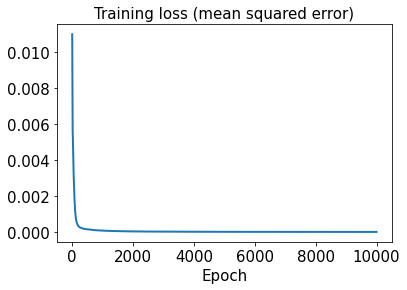

In [27]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

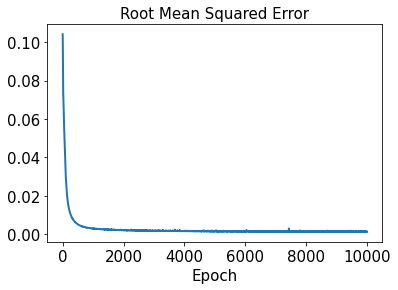

In [28]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [29]:
test_results = sd.evaluate(x_train)

13/13 [==============================] - 0s 2ms/step - loss: 1.9829e-05 - rmse: 0.0000e+00


In [30]:
decoded_train = sd.predict(x_train)

In [31]:
decoded_test = sd.predict(x_test)

In [32]:
error_train_abs = np.abs(decoded_train - y_train)

In [33]:
error_test_abs = np.abs(decoded_test - y_test)

In [34]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00014784746


In [35]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0043507507


In [36]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
#print(l2_error_train_list)

In [37]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
#print(l2_error_test_list)

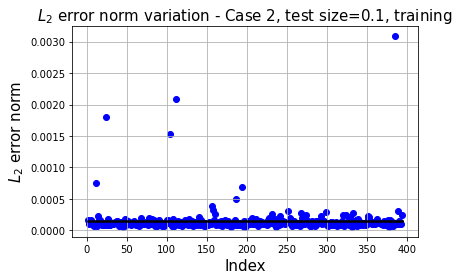

In [38]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 2, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

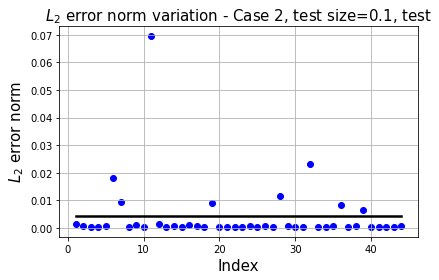

In [39]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variation - Case 2, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

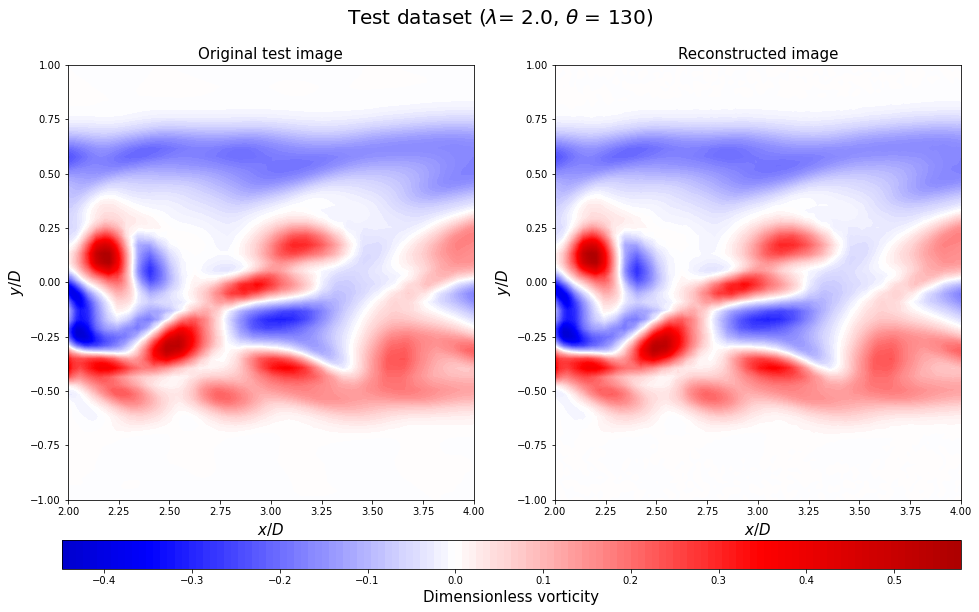

In [42]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

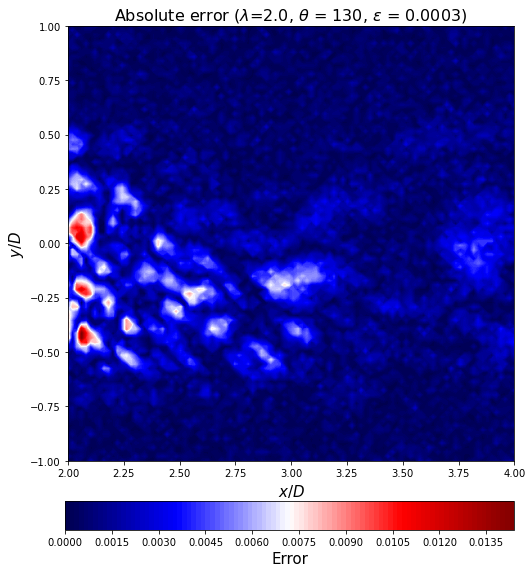

In [41]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()